<a href="https://colab.research.google.com/github/jhonatanlang/DSP2/blob/master/Activity_9/Atividade_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 9: Histograma e Binarização de Imagens

###Alunos: Hazael dos Santos Batista; Jhonatan de Freitas Lang

## Histograma

**1. O que é o histograma de uma imagem?**

Histograma de uma imagem é um diagrama que contém informação da quantidade de pixeis de determinada cor/intensidade que a imagem possui.

**2. Na imagem _fingerprint_ [2], é possível distinguir o fundo e a impressão digital observando o histograma?**

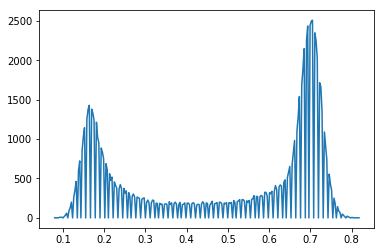

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import skimage.io as skio
from skimage import img_as_float
from skimage import exposure

image = skio.imread('fingerprint.jpg')
fimage = img_as_float(image)

hist, bins = exposure.histogram(fimage)

plt.plot(bins, hist)
plt.show()

## Binarização

**3. Qual limite poderia ser usado para binarizar a imagem _fingerprint_? Observe e apresente o histograma, teste e mostre a imagem binarizada resultante lado a lado com a imagem original usando `imshowpair`.**

Mais ou menos entre 0.3 e 0.6. Foi utilizado 100/255 $\approx$ 0.392

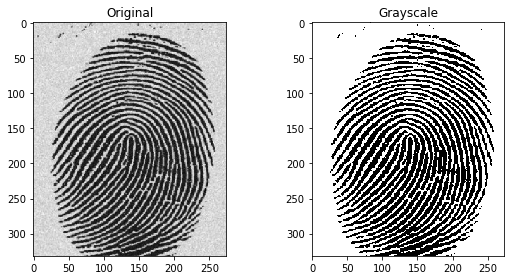

In [2]:
threshold = 100/255
binary = fimage > threshold

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(binary, cmap='gray')
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

**4. De forma semelhante, que limite poderia ser usado para binarizar a imagem _son1_ ou _darkerforeground_ [3]? Mostre o resultado.**

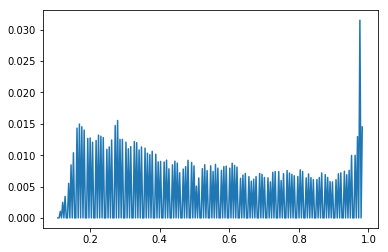

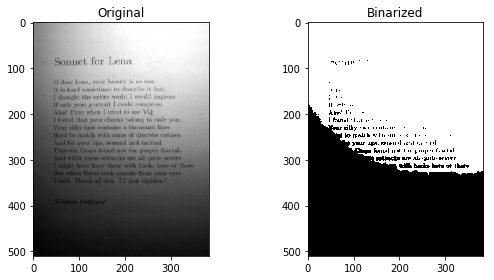

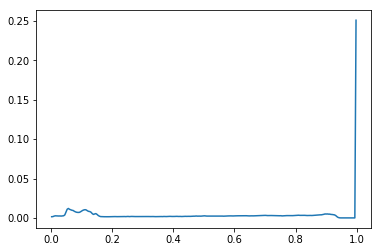

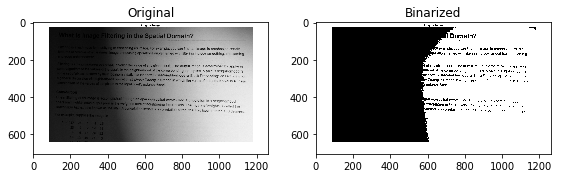

In [7]:
from skimage.color import rgb2gray

image = skio.imread('son1.gif')
fimage = img_as_float(image)
hist, bins = exposure.histogram(fimage, normalize=True)
plt.figure(1)
plt.plot(bins, hist)
plt.show()

threshold = 110/255
binary = fimage > threshold

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(binary, cmap='gray')
ax[1].set_title("Binarized")

fig.tight_layout()
plt.show()

image = skio.imread('BinarizeImagesWithDarkerForegroundThanBackgroundExample_01.png')
image = rgb2gray(image)
fimage = img_as_float(image)
hist, bins = exposure.histogram(fimage, normalize=True)

plt.figure(2)
plt.plot(bins, hist)
plt.show()

threshold = 110/255
binary = fimage > threshold

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(binary, cmap='gray')
ax[1].set_title("Binarized")

fig.tight_layout()
plt.show()

**5. Verifique que a binarização global da imagem _son1_ ou _darkerforeground_ [3] não provê um bom resultado. Use um limiar adaptativo (`threshold_local` no módulo _Scikit Image_ a partir da versão 0.13 [4] e mostre o resultado.**

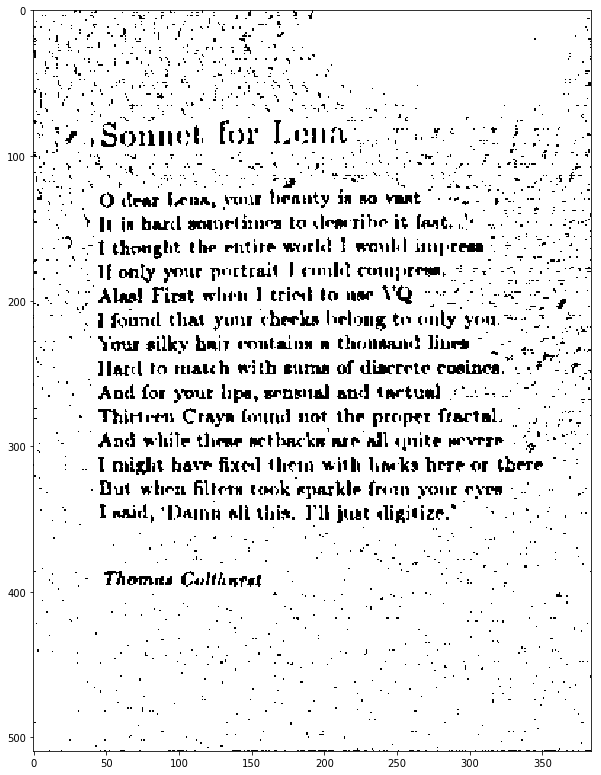

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


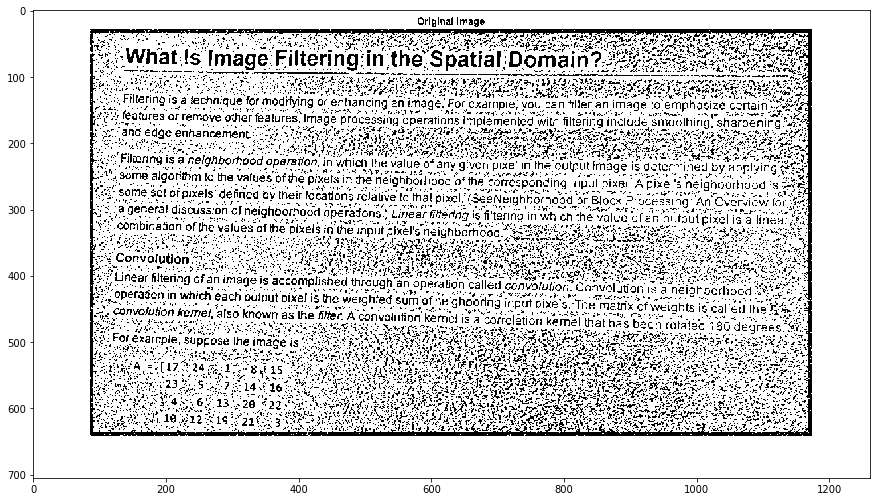

In [12]:
from skimage.filters import threshold_otsu, rank
from skimage.morphology import disk
from skimage.util import img_as_ubyte

image = skio.imread('son1.gif')
image = img_as_ubyte(image)

radius = 5
selem = disk(radius)

local_otsu = rank.otsu(image, selem)
image = image >= local_otsu

plt.figure(figsize=(10, 15))
plt.imshow(image, 'gray')
plt.show()

image = skio.imread('BinarizeImagesWithDarkerForegroundThanBackgroundExample_01.png')
image = rgb2gray(image)
image = img_as_ubyte(image)
local_otsu = rank.otsu(image, selem)
image = image >= local_otsu

plt.figure(figsize=(15, 10))
plt.imshow(image, 'gray')
plt.show()

**6. Observe o histograma da imagem _pout_ [5]. O que você pode concluir?**

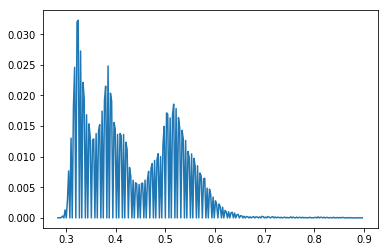

In [38]:
image = skio.imread('pout.jpg')
fimage = img_as_float(image)
hist, bins = exposure.histogram(fimage, normalize=True)
plt.figure(1)
plt.plot(bins, hist)
plt.show()

Quase não há presença de pixels com alta intensidade na imagem (é uma imagem escura).

## Equalização de histograma

**7. Compare as técnicas de equalização de histograma implementadas nas funções `rescale_intensity`, `equalize_hist` e `equalize_adapthist` do _Scikit Image_ [6] , usando a imagem _pout_ [5] como teste. Pesquise as referências apresentadas na documentação de cada uma das funções e explique as diferenças entre elas.**

`rescale_intensity`: reescala a imagem de forma que ela contenha todas as intensidades entre duas porcentagens de intensidade distintas.

`equalize_hist`: espalha o histograma de forma que a imagem contenha pixeis de intensidades mais distintos.

`equalize_adapthist`: espalha o histograma como o `equalize_hist`, porém de forma suave, gerando pixeis de novas intensidades para ocupar o "gap" de intensidades entre bins.

**8. De forma semelhante, aplique uma das técnicas de equalização de histograma para realçar a imagem _dentalradiograph_ [7].**

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


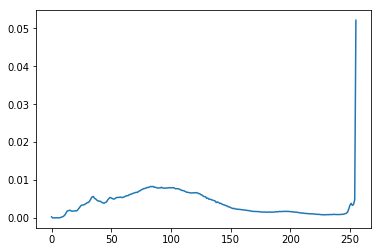

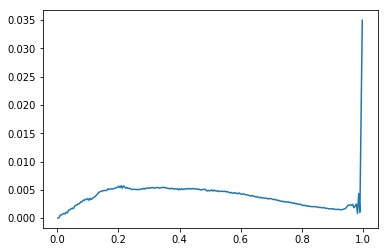

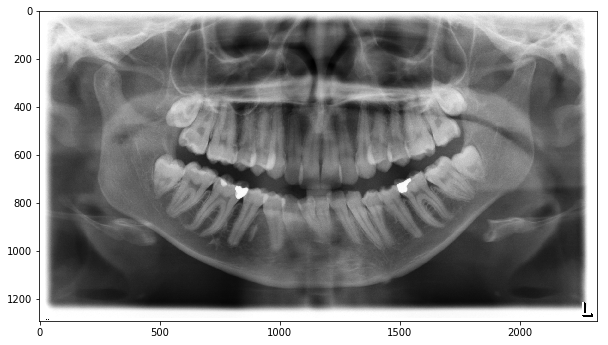

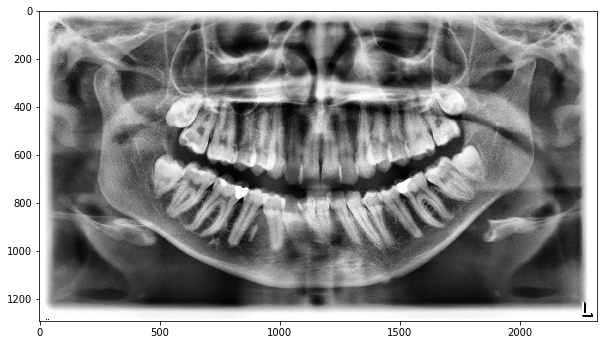

In [17]:
image = skio.imread('DentalRadiograph.png')
image_eq = exposure.equalize_adapthist(img_as_float(image))

plt.figure(1)
hist, bins = exposure.histogram(image, normalize=True)
plt.plot(bins, hist)
plt.show()

plt.figure(2)
hist, bins = exposure.histogram(image_eq, normalize=True)
plt.plot(bins, hist)
plt.show()

plt.figure(figsize=(10, 15))
plt.imshow(image, 'gray')
plt.show()
plt.figure(figsize=(10, 15))
plt.imshow(image_eq, 'gray')
plt.show()

## Introdução a filtros em imagens

**9. A imagem _compareresults_ [8] foi corrompida com ruído do tipo sal e pimenta (_salt and pepper noise_). Use um filtro de média (`rank.mean` [9] de `skimage.filters`) para melhorá-la. Qual o resultado?**

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


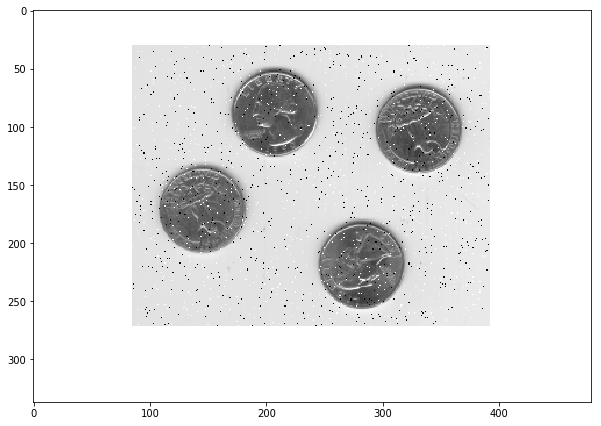

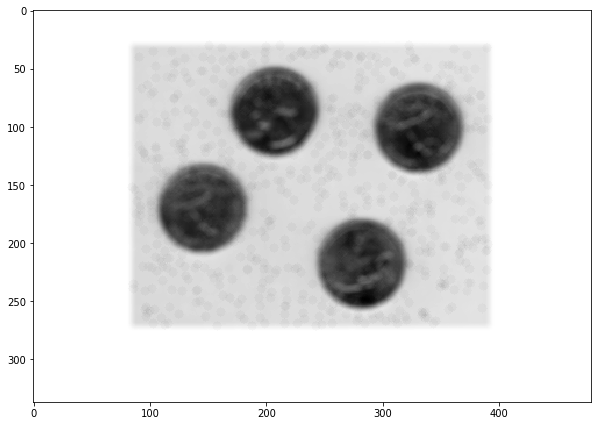

In [22]:
image = rgb2gray(skio.imread('CompareResultsOfAveragingFilterAndMedianFilterExample_02.png'))
image_mean = rank.mean(image, disk(4));

plt.figure(figsize=(10, 15))
plt.imshow(image, 'gray')
plt.show()

plt.figure(figsize=(10, 15))
plt.imshow(image_mean, 'gray')
plt.show()

**10. Use, agora, um filtro de mediana (`skimage.filters.rank.median` [10]) para melhorar a imagem _compareresults_ [8]. Qual o resultado? O que é a mediana e por que um filtro desse tipo é melhor para esse caso?**

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


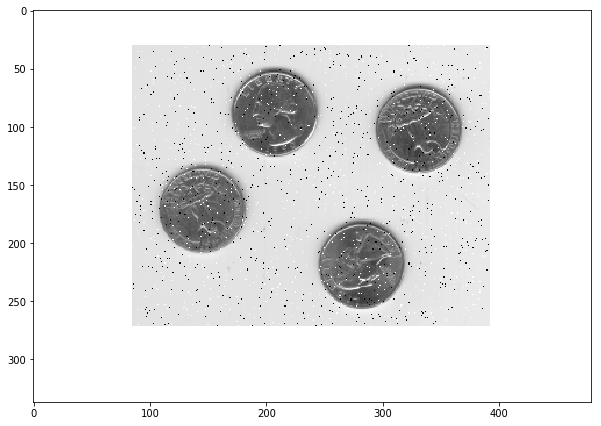

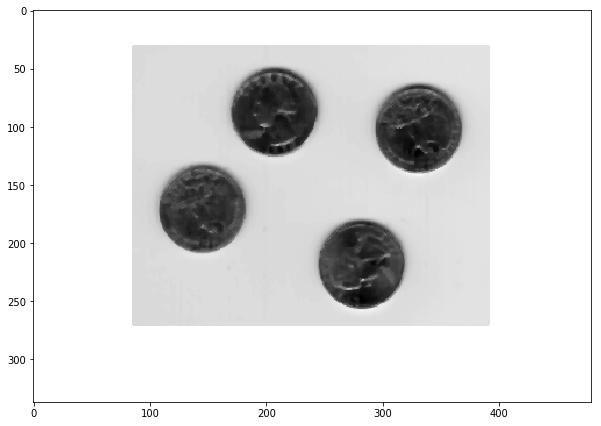

In [41]:
image_median = rank.median(image, disk(2));

plt.figure(figsize=(10, 15))
plt.imshow(image, 'gray')
plt.show()

plt.figure(figsize=(10, 15))
plt.imshow(image_median, 'gray')
plt.show()

O filtro de mediana realiza um trabalho melhor a remover os "chuviscos" pretos e brancos pois é um filtro não linear em que nessa situação que o fundo é todo de uma cor, a mediana numa região tende a ser essa cor, removendo completamente o chuvisco da imagem.

## Referências
[1] https://pypi.org/project/imshowpair/

[2] http://fmwconcepts.com/imagemagick/otsuthresh/images/fingerprint.jpg

[3] http://homepages.inf.ed.ac.uk/rbf/HIPR2/images/son1.gif ou https://www.mathworks.com/help/examples/images/win64/BinarizeImagesWithDarkerForegroundThanBackgroundExample_01.png

[4] https://scikit-image.org/docs/stable/auto_examples/applications/plot_thresholding.html

[5] http://www.johnloomis.org/ece563/notes/enhancement/scale/pout.jpg

[6] https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html

[7] https://imagej.nih.gov/ij/images/DentalRadiograph.png

[8] http://www.mathworks.com/help/releases/R2016b/examples/images/CompareResultsOfAveragingFilterAndMedianFilterExample_02.png

[9] https://scikit-image.org/docs/stable/auto_examples/filters/plot_rank_mean.html

[10] https://scikit-image.org/docs/stable/auto_examples/applications/plot_rank_filters.html#noise-removal

## Bibliografia

https://www.mathworks.com/examples/image/mw/images-ex28564424-create-image-histogram

https://www.mathworks.com/examples/image/mw/images-ex57959084-basic-image-enhancement-and-analysis-techniques

http://www.mathworks.com/help/images/ref/imbinarize.html

http://blogs.mathworks.com/steve/2016/06/14/image-binarization-otsus-method

https://www.mathworks.com/examples/image/mw/images-ex97343802-contrast-enhancement-techniques

https://www.mathworks.com/examples/image/mw/images-ex74217292-remove-noise-using-an-averaging-filter-and-a-median-filter

https://www.mathworks.com/examples/image/mw/images-ex48835658-detect-edges-in-images

https://www.mathworks.com/examples/image/mw/images-ex80028725-trace-boundaries-of-objects-in-images

https://www.mathworks.com/examples/image/mw/images-ex45754758-filter-images-using-predefined-filters

https://www.mathworks.com/examples/image/community/18507-missing-planes